In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('portfolio_data.csv')

In [ ]:
df

,Date,AMZN,DPZ,BTC,NFLX
0,5/1/2013,248.229996,51.190983,106.250000,30.415714
1,5/2/2013,252.550003,51.987320,98.099998,30.641428
2,5/3/2013,258.049988,52.446388,112.900002,30.492857
3,5/6/2013,255.720001,53.205257,109.599998,30.098572
4,5/7/2013,257.730011,54.151505,113.199997,29.464285
...,...,...,...,...,...
1515,5/8/2019,1917.770020,283.149994,6171.959961,364.369995
1516,5/9/2019,1899.869995,282.160004,6358.290039,362.750000
1517,5/10/2019,1889.979980,278.369995,7191.359863,361.040009
1518,5/13/2019,1822.680054,273.880005,7980.129883,345.260010


In [ ]:
import matplotlib.pyplot as plt

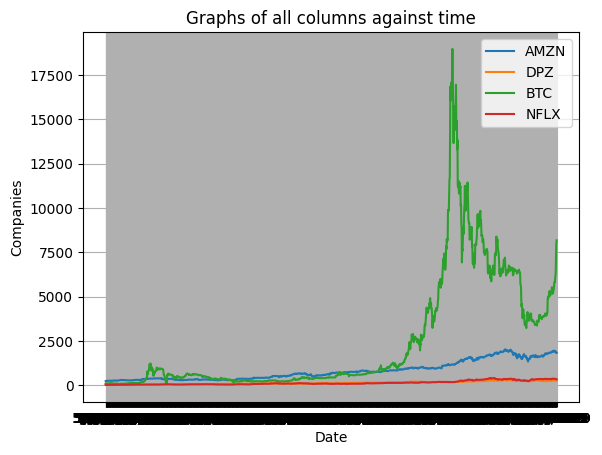

In [ ]:
# Assuming 'time' is a column in your DataFrame
import matplotlib.pyplot as plt

# Assuming 'time' is a column in your DataFrame
for column in df.columns:
    if column != 'Date':  # Exclude the 'time' column itself
        plt.plot(df['Date'], df[column], label=column)

plt.xlabel('Date')
plt.ylabel('Companies')
plt.title('Graphs of all columns against time')
plt.legend()
plt.grid(True)
plt.show()


Means:
                    AMZN         DPZ          BTC        NFLX
Date                                                        
2013-05-01   248.229996   51.190983   106.250000   30.415714
2013-05-02   252.550003   51.987320    98.099998   30.641428
2013-05-03   258.049988   52.446388   112.900002   30.492857
2013-05-06   255.720001   53.205257   109.599998   30.098572
2013-05-07   257.730011   54.151505   113.199997   29.464285
...                 ...         ...          ...         ...
2019-05-08  1917.770020  283.149994  6171.959961  364.369995
2019-05-09  1899.869995  282.160004  6358.290039  362.750000
2019-05-10  1889.979980  278.369995  7191.359863  361.040009
2019-05-13  1822.680054  273.880005  7980.129883  345.260010
2019-05-14  1840.119995  272.859985  8183.830078  345.609985

[1520 rows x 4 columns]

Variances:
             AMZN  DPZ  BTC  NFLX
Date                            
2013-05-01   NaN  NaN  NaN   NaN
2013-05-02   NaN  NaN  NaN   NaN
2013-05-03   NaN  NaN  NaN   

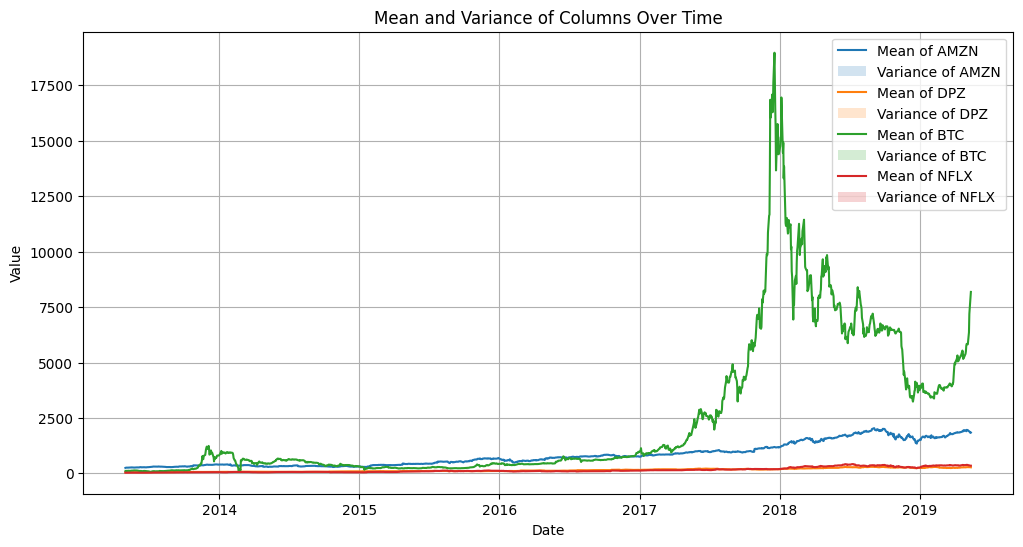

In [ ]:
# prompt: calculate mean and variance of each column with date

import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('portfolio_data.csv')

# Convert 'Date' column to datetime objects if it's not already
df['Date'] = pd.to_datetime(df['Date'])

# Group data by date and calculate the mean and variance for each column
grouped = df.groupby('Date')
means = grouped.mean()
variances = grouped.var()

# Print the results
print("Means:\n", means)
print("\nVariances:\n", variances)



# Plotting means and variances (optional)
plt.figure(figsize=(12, 6))  # Adjust figure size as needed

for col in means.columns:
    plt.plot(means.index, means[col], label=f'Mean of {col}')
    plt.fill_between(means.index, means[col] - variances[col]**0.5, means[col] + variances[col]**0.5, alpha=0.2, label=f'Variance of {col}')

plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Mean and Variance of Columns Over Time')
plt.legend()
plt.grid(True)
plt.show()


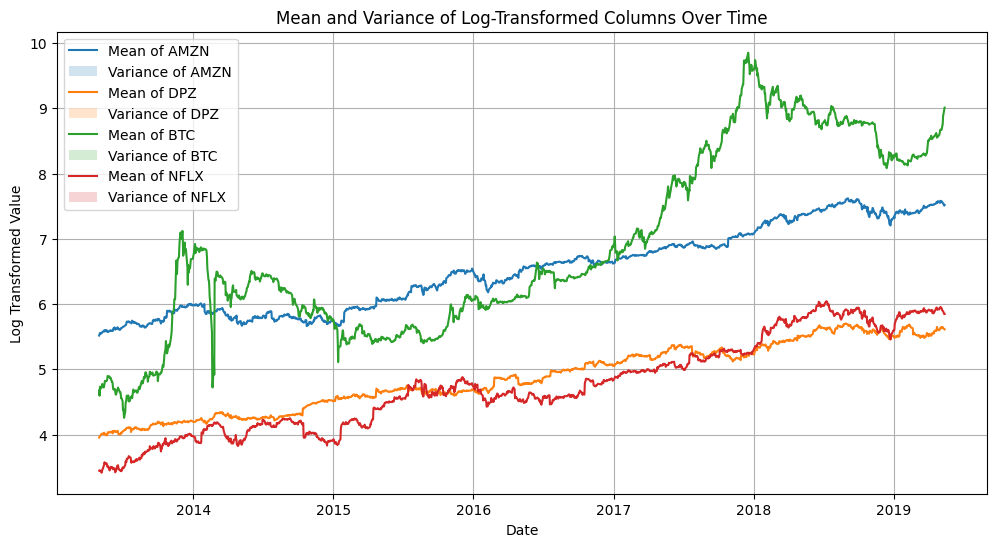

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the data
df = pd.read_csv('portfolio_data.csv')
df['Date'] = pd.to_datetime(df['Date'])

# Apply logarithmic transformation to the relevant columns
for column in df.columns:
    if column != 'Date':  # Skip the 'Date' column
        # Add a small constant to handle zero values
        df[column] = np.log1p(df[column])  # log1p is more numerically stable

# Group data by date and calculate the mean and variance for each column
grouped = df.groupby('Date')
means = grouped.mean()
variances = grouped.var()

# Plotting means and variances after transformation
plt.figure(figsize=(12, 6))

for col in means.columns:
    plt.plot(means.index, means[col], label=f'Mean of {col}')
    plt.fill_between(means.index, means[col] - variances[col]**0.5, means[col] + variances[col]**0.5, alpha=0.2, label=f'Variance of {col}')

plt.xlabel('Date')
plt.ylabel('Log Transformed Value') # Change y-axis label
plt.title('Mean and Variance of Log-Transformed Columns Over Time')
plt.legend()
plt.grid(True)
plt.show()
